In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path='Downloads/Fruits_Vegetables/train'
data_test_path='Downloads/Fruits_Vegetables/test'
data_val_path='Downloads/Fruits_Vegetables/validation'

In [4]:
img_width=180
img_height=180

In [5]:
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,
                                                       shuffle=True,
                                                       image_size=(img_width,img_height),
                                                       batch_size=32,
                                                       validation_split=False
                                                      )

Found 3115 files belonging to 36 classes.


In [59]:
data_cat=data_train.class_names

In [60]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [12]:
data_val=tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       shuffle=True,
                                                       image_size=(img_width,img_height),
                                                       batch_size=32,
                                                       validation_split=False
                                                      )

Found 351 files belonging to 36 classes.


In [13]:
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                       shuffle=True,
                                                       image_size=(img_width,img_height),
                                                       batch_size=32,
                                                       validation_split=False
                                                      )

Found 359 files belonging to 36 classes.


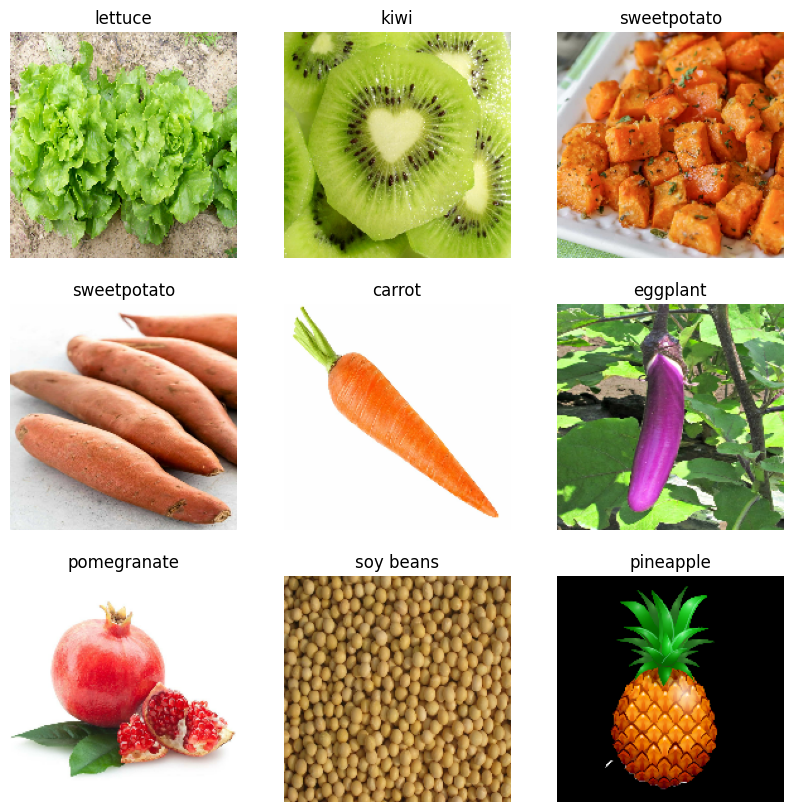

In [62]:
import matplotlib.pyplot as plt

# Iterate through a single batch of images and labels
for images, labels in data_train.take(1):
    # Set up a 3x3 grid for displaying 9 images
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Show the first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))  # Convert Tensor to NumPy and uint8
        plt.title(data_cat[labels[i].numpy()])  # Convert label Tensor to NumPy for indexing
        plt.axis('off')  # Remove axes for cleaner display
    plt.show()


In [20]:
from tensorflow.keras.models import Sequential

In [36]:
model=Sequential([
     layers.Rescaling(1./255),
     layers.Conv2D(16,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(32,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(64,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),
     layers.Flatten(),
     layers.Dropout(0.2),
     layers.Dense(len(data_cat))


    
])

In [37]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [38]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 352ms/step - accuracy: 0.0843 - loss: 3.3900 - val_accuracy: 0.4786 - val_loss: 2.0217
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 345ms/step - accuracy: 0.3299 - loss: 2.2740 - val_accuracy: 0.6553 - val_loss: 1.3753
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 349ms/step - accuracy: 0.5136 - loss: 1.6809 - val_accuracy: 0.8006 - val_loss: 0.7998
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/step - accuracy: 0.6845 - loss: 1.1180 - val_accuracy: 0.9031 - val_loss: 0.5440
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 356ms/step - accuracy: 0.8260 - loss: 0.6177 - val_accuracy: 0.9202 - val_loss: 0.4158
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 350ms/step - accuracy: 0.9139 - loss: 0.3145 - val_accuracy: 0.9202 - val_loss: 0.4233
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 361ms/step - accuracy: 0.9241 - loss: 0.2427 - val_accuracy: 0.9459 - val_loss: 0.3554
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.9712 - loss: 0.1464 - val_accu

In [55]:
image='Downloads/Fruits_Vegetables/banana.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [56]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [57]:
score=tf.nn.softmax(predict)


In [58]:
print("Veg/Fruit in image is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)],np.max(score)*100))


Veg/Fruit in image is tomato with accuracy of 67.77
